<a href="https://www.kaggle.com/code/sohaashraf1/airbnb-competition?scriptVersionId=258681086" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1. Data Collection

In [1]:
import numpy as np 
import pandas as pd 

df_age=pd.read_csv('/kaggle/input/airbnb-recruiting-new-user-bookings/age_gender_bkts.csv.zip')
df_age

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0
...,...,...,...,...,...
415,95-99,US,male,115.0,2015.0
416,90-94,US,male,541.0,2015.0
417,15-19,US,female,10570.0,2015.0
418,85-89,US,male,1441.0,2015.0


In [2]:
df_countries=pd.read_csv('/kaggle/input/airbnb-recruiting-new-user-bookings/countries.csv.zip')
df_countries

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


In [3]:
df_submission=pd.read_csv('/kaggle/input/airbnb-recruiting-new-user-bookings/sample_submission_NDF.csv.zip')
df_submission

,id,country
0,5uwns89zht,NDF
1,jtl0dijy2j,NDF
2,xx0ulgorjt,NDF
3,6c6puo6ix0,NDF
4,czqhjk3yfe,NDF
...,...,...
62091,cv0na2lf5a,NDF
62092,zp8xfonng8,NDF
62093,fa6260ziny,NDF
62094,87k0fy4ugm,NDF


In [4]:
df_sessions=pd.read_csv('/kaggle/input/airbnb-recruiting-new-user-bookings/sessions.csv.zip')
df_sessions

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
...,...,...,...,...,...,...
10567732,9uqfg8txu3,dashboard,view,dashboard,Windows Desktop,556.0
10567733,9uqfg8txu3,edit,view,edit_profile,Windows Desktop,6624.0
10567734,9uqfg8txu3,webcam_upload,-unknown-,-unknown-,Windows Desktop,200125.0
10567735,9uqfg8txu3,active,-unknown-,-unknown-,-unknown-,17624.0


In [5]:
import warnings
warnings.filterwarnings("ignore")
df_train=pd.read_csv('/kaggle/input/airbnb-recruiting-new-user-bookings/train_users_2.csv.zip')
df_train

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
213447,mhewnxesx9,2014-06-30,20140630235719,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
213448,6o3arsjbb4,2014-06-30,20140630235754,NaN,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
213449,jh95kwisub,2014-06-30,20140630235822,NaN,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF


In [6]:
df_test=pd.read_csv('/kaggle/input/airbnb-recruiting-new-user-bookings/test_users.csv.zip')
df_test

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62091,cv0na2lf5a,2014-09-30,20140930235232,NaN,-unknown-,31.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE
62092,zp8xfonng8,2014-09-30,20140930235306,NaN,-unknown-,NaN,basic,23,ko,direct,direct,untracked,Android,Android Phone,-unknown-
62093,fa6260ziny,2014-09-30,20140930235408,NaN,-unknown-,NaN,basic,0,de,direct,direct,linked,Web,Windows Desktop,Firefox
62094,87k0fy4ugm,2014-09-30,20140930235430,NaN,-unknown-,NaN,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari


# 2. Data Cleaning

**sessions cleaning**

In [7]:
df_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        object 
 1   action         object 
 2   action_type    object 
 3   action_detail  object 
 4   device_type    object 
 5   secs_elapsed   float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB


In [8]:
df_sessions.isnull().sum()

user_id            34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64

In [9]:
df_sessions['action'].fillna('unknown', inplace=True)
df_sessions['action_type'].fillna('unknown', inplace=True)
df_sessions['action_detail'].fillna('unknown', inplace=True)
df_sessions['device_type'] = df_sessions['device_type'].replace('-unknown-', 'unknown')
df_sessions['action_type'] = df_sessions['action_type'].replace('-unknown-', 'unknown')
df_sessions['action_detail'] = df_sessions['action_detail'].replace('-unknown-', 'unknown')

In [10]:
secs_elapsed_median=df_sessions['secs_elapsed'].median()
secs_elapsed_median

1147.0

In [11]:
df_sessions.describe().T

,count,mean,std,min,25%,50%,75%,max
secs_elapsed,10431706.0,19405.810751,88884.243208,0.0,229.0,1147.0,8444.0,1799977.0


In [12]:
def impute_secs_elapsed(row):
    if row['action'] == 'unknown':
        return 0  
    elif pd.isnull(row['secs_elapsed']):
        return secs_elapsed_median  
    else:
        return row['secs_elapsed']  

df_sessions['secs_elapsed'] = df_sessions.apply(impute_secs_elapsed, axis=1)

In [13]:
df_sessions.isnull().sum()

user_id          34496
action               0
action_type          0
action_detail        0
device_type          0
secs_elapsed         0
dtype: int64

**training data**

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

In [15]:
df_train.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [16]:
df_train.duplicated().sum()

0

In [17]:
df_train['date_first_booking'] = pd.to_datetime(df_train['date_first_booking'])

In [18]:
df_train['date_first_booking'].median()

Timestamp('2013-09-11 00:00:00')

In [19]:
df_train['date_first_booking'] = df_train['date_first_booking'].fillna(df_train['date_first_booking'].median())


In [20]:
df_train.describe().T

,count,mean,min,25%,50%,75%,max,std
timestamp_first_active,213451.0,20130850417367.257812,20090319043255.0,20121225073327.5,20130911061308.0,20140306082494.0,20140630235824.0,9253717046.583824
date_first_booking,213451,2013-08-13 13:37:17.487760640,2010-01-02 00:00:00,2013-09-11 00:00:00,2013-09-11 00:00:00,2013-09-11 00:00:00,2015-06-29 00:00:00,NaN
age,125461.0,49.668335,1.0,28.0,34.0,43.0,2014.0,155.666612
signup_flow,213451.0,3.267387,0.0,0.0,0.0,0.0,25.0,7.637707


In [21]:
Q1 = df_train['age'].quantile(0.25)
Q3 = df_train['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [22]:
lower_bound

5.5

In [23]:

df_train['age'] = np.where((df_train['age'] >= lower_bound) & (df_train['age'] <= upper_bound), df_train['age'], df_train['age'].median())

In [24]:
bins = [15, 25, 35, 45, 55, 65, 75, 85, 100]
labels = ['15-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-100']

df_train['age_group'] = pd.cut(df_train['age'], bins=bins, labels=labels, right=False)


In [25]:
df_train.drop(columns=['age'], inplace=True)

In [26]:
modevalue=df_train['first_affiliate_tracked'].mode()[0]
modevalue


'untracked'

In [27]:
df_train['first_affiliate_tracked'].fillna(modevalue, inplace=True)


In [28]:
df_train.isnull().sum()

id                         0
date_account_created       0
timestamp_first_active     0
date_first_booking         0
gender                     0
signup_method              0
signup_flow                0
language                   0
affiliate_channel          0
affiliate_provider         0
first_affiliate_tracked    0
signup_app                 0
first_device_type          0
first_browser              0
country_destination        0
age_group                  0
dtype: int64

In [29]:
df_train

,id,date_account_created,timestamp_first_active,date_first_booking,gender,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,age_group
0,gxn3p5htnn,2010-06-28,20090319043255,2013-09-11,-unknown-,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,26-35
1,820tgsjxq7,2011-05-25,20090523174809,2013-09-11,MALE,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,36-45
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,56-65
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,36-45
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,36-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,20140630235636,2013-09-11,MALE,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF,26-35
213447,mhewnxesx9,2014-06-30,20140630235719,2013-09-11,-unknown-,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF,26-35
213448,6o3arsjbb4,2014-06-30,20140630235754,2013-09-11,-unknown-,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF,26-35
213449,jh95kwisub,2014-06-30,20140630235822,2013-09-11,-unknown-,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF,26-35


In [30]:
oldest_date_1 = df_train['date_first_booking'].min()
latest_date_2 = df_train['date_first_booking'].max()

In [31]:

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import ndcg_score, accuracy_score



def preprocess_data(df):
    
    df['date_account_created'] = pd.to_datetime(df['date_account_created'])
    df['timestamp_first_active'] = pd.to_datetime(df['timestamp_first_active'], format='%Y%m%d%H%M%S')
    
    df['account_created_year'] = df['date_account_created'].dt.year
    df['account_created_month'] = df['date_account_created'].dt.month
    df['account_created_day'] = df['date_account_created'].dt.day
    df['first_active_year'] = df['timestamp_first_active'].dt.year
    df['first_active_month'] = df['timestamp_first_active'].dt.month
    df['first_active_day'] = df['timestamp_first_active'].dt.day
    df['first_booking_year'] = df['date_first_booking'].dt.year
    df['first_booking_month'] = df['date_first_booking'].dt.month
    df['first_booking_day'] = df['date_first_booking'].dt.day
    df.drop(['date_account_created', 'date_first_booking', 'timestamp_first_active'], axis=1, inplace=True)
    
    
    
    return df

train_users = preprocess_data(df_train)



In [32]:
train_users.describe().T

,count,mean,std,min,25%,50%,75%,max
signup_flow,213451.0,3.267387,7.637707,0.0,0.0,0.0,0.0,25.0
account_created_year,213451.0,2013.023846,0.938489,2010.0,2012.0,2013.0,2014.0,2014.0
account_created_month,213451.0,6.022459,3.236690,1.0,3.0,6.0,9.0,12.0
account_created_day,213451.0,15.869230,8.740107,1.0,8.0,16.0,23.0,31.0
first_active_year,213451.0,2013.023218,0.939039,2009.0,2012.0,2013.0,2014.0,2014.0
first_active_month,213451.0,6.022385,3.236501,1.0,3.0,6.0,9.0,12.0
first_active_day,213451.0,15.869071,8.739582,1.0,8.0,16.0,23.0,31.0
first_booking_year,213451.0,2013.017845,0.656313,2010.0,2013.0,2013.0,2013.0,2015.0
first_booking_month,213451.0,7.796487,2.498683,1.0,7.0,9.0,9.0,12.0
first_booking_day,213451.0,12.934561,6.079097,1.0,11.0,11.0,13.0,31.0


In [33]:
df_sessions.rename(columns={'user_id': 'id'}, inplace=True)

In [34]:
session_agg = df_sessions.groupby('id').agg({
    'secs_elapsed': ['sum', 'mean', 'count'],
    'action': ['count'],
    'action_type': ['nunique'],
    'action_detail': ['nunique'],
    'device_type': ['nunique']
}).reset_index()
session_agg.columns = ['id','total_secs', 'avg_secs', 'session_count', 
                       'count_actions', 'unique_action_types', 'unique_action_details', 
                       'unique_device_types']

train_users = train_users.merge(session_agg, on='id', how='left')

In [35]:
train_users.isnull().sum()

id                              0
gender                          0
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked         0
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
age_group                       0
account_created_year            0
account_created_month           0
account_created_day             0
first_active_year               0
first_active_month              0
first_active_day                0
first_booking_year              0
first_booking_month             0
first_booking_day               0
total_secs                 139636
avg_secs                   139636
session_count              139636
count_actions              139636
unique_action_types        139636
unique_action_details      139636
unique_device_types        139636
dtype: int64

In [36]:
train_users.describe().T

,count,mean,std,min,25%,50%,75%,max
signup_flow,213451.0,3.267387e+00,7.637707e+00,0.0,0.000000,0.000000,0.000000e+00,25.0
account_created_year,213451.0,2.013024e+03,9.384891e-01,2010.0,2012.000000,2013.000000,2.014000e+03,2014.0
account_created_month,213451.0,6.022459e+00,3.236690e+00,1.0,3.000000,6.000000,9.000000e+00,12.0
account_created_day,213451.0,1.586923e+01,8.740107e+00,1.0,8.000000,16.000000,2.300000e+01,31.0
first_active_year,213451.0,2.013023e+03,9.390389e-01,2009.0,2012.000000,2013.000000,2.014000e+03,2014.0
first_active_month,213451.0,6.022385e+00,3.236501e+00,1.0,3.000000,6.000000,9.000000e+00,12.0
first_active_day,213451.0,1.586907e+01,8.739582e+00,1.0,8.000000,16.000000,2.300000e+01,31.0
first_booking_year,213451.0,2.013018e+03,6.563135e-01,2010.0,2013.000000,2013.000000,2.013000e+03,2015.0
first_booking_month,213451.0,7.796487e+00,2.498683e+00,1.0,7.000000,9.000000,9.000000e+00,12.0
first_booking_day,213451.0,1.293456e+01,6.079097e+00,1.0,11.000000,11.000000,1.300000e+01,31.0


In [37]:
train_users['total_secs'].fillna(train_users['total_secs'].median(), inplace=True)
train_users['avg_secs'].fillna(train_users['avg_secs'].median(), inplace=True)
train_users['session_count'].fillna(train_users['session_count'].median(), inplace=True)
train_users['count_actions'].fillna(train_users['count_actions'].median(), inplace=True)
train_users['unique_action_types'].fillna(train_users['unique_action_types'].median(), inplace=True)
train_users['unique_action_details'].fillna(train_users['unique_action_details'].median(), inplace=True)
train_users['unique_device_types'].fillna(train_users['unique_device_types'].median(), inplace=True)

In [38]:
df_train.drop(columns=['id'], inplace=True)


**Age data**

In [39]:
df_age.isnull().sum()

age_bucket                 0
country_destination        0
gender                     0
population_in_thousands    0
year                       0
dtype: int64

**countries data**

In [40]:
df_countries.isnull().sum()

country_destination              0
lat_destination                  0
lng_destination                  0
distance_km                      0
destination_km2                  0
destination_language             0
language_levenshtein_distance    0
dtype: int64

**test data**

In [41]:
df_test

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62091,cv0na2lf5a,2014-09-30,20140930235232,NaN,-unknown-,31.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE
62092,zp8xfonng8,2014-09-30,20140930235306,NaN,-unknown-,NaN,basic,23,ko,direct,direct,untracked,Android,Android Phone,-unknown-
62093,fa6260ziny,2014-09-30,20140930235408,NaN,-unknown-,NaN,basic,0,de,direct,direct,linked,Web,Windows Desktop,Firefox
62094,87k0fy4ugm,2014-09-30,20140930235430,NaN,-unknown-,NaN,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari


In [42]:
df_test.isnull().sum()

id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         62096
gender                         0
age                        28876
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked       20
signup_app                     0
first_device_type              0
first_browser                  0
dtype: int64

In [43]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
timestamp_first_active,62096.0,2.014081e+13,8.024585e+07,2.014070e+13,2.014072e+13,2.014081e+13,2.014091e+13,2.014093e+13
date_first_booking,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,33220.0,3.761668e+01,7.444065e+01,1.000000e+00,2.600000e+01,3.100000e+01,4.000000e+01,2.002000e+03
signup_flow,62096.0,7.813885e+00,1.125429e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.300000e+01,2.500000e+01


In [44]:
df_test['date_first_booking'] = pd.to_datetime(df_test['date_first_booking'], errors='coerce')

In [45]:
start_date = oldest_date_1
end_date = latest_date_2

date_range = pd.date_range(start=start_date, end=end_date, freq='D')

missing_dates_count = df_test['date_first_booking'].isna().sum()

random_dates = np.random.choice(date_range, size=missing_dates_count)

df_test.loc[df_test['date_first_booking'].isna(), 'date_first_booking'] = random_dates

In [46]:
df_test['date_first_booking'] = pd.to_datetime(df_test['date_first_booking'])

In [47]:
test_users = preprocess_data(df_test)


In [48]:
test_users.isnull().sum()

id                             0
gender                         0
age                        28876
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked       20
signup_app                     0
first_device_type              0
first_browser                  0
account_created_year           0
account_created_month          0
account_created_day            0
first_active_year              0
first_active_month             0
first_active_day               0
first_booking_year             0
first_booking_month            0
first_booking_day              0
dtype: int64

In [49]:
test_users['first_affiliate_tracked'] = test_users['first_affiliate_tracked'].fillna(test_users['first_affiliate_tracked'].mode()[0])


In [50]:
test_users['gender'] = test_users['gender'].replace('-unknown-', 'Unknown')
test_users['language'] = test_users['language'].replace('-unknown-', 'Unknown')
mode_signup_method = test_users['signup_method'].mode()[0]

# Replace 'weibo' with the mode in the 'signup_method' column bec is not present in the df_train
test_users['signup_method'] = test_users['signup_method'].replace('weibo', mode_signup_method)

In [51]:
Q1 = test_users['age'].quantile(0.25)
Q3 = test_users['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [52]:
test_users['age'] = np.where((test_users['age'] >= lower_bound) & (test_users['age'] <= upper_bound), test_users['age'], test_users['age'].median())

In [53]:
bins = [15, 25, 35, 45, 55, 65, 75, 85, 100]
labels = ['15-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-100']

test_users['age_group'] = pd.cut(test_users['age'], bins=bins, labels=labels, right=False)


In [54]:
test_users.isnull().sum()


id                         0
gender                     0
age                        0
signup_method              0
signup_flow                0
language                   0
affiliate_channel          0
affiliate_provider         0
first_affiliate_tracked    0
signup_app                 0
first_device_type          0
first_browser              0
account_created_year       0
account_created_month      0
account_created_day        0
first_active_year          0
first_active_month         0
first_active_day           0
first_booking_year         0
first_booking_month        0
first_booking_day          0
age_group                  0
dtype: int64

In [55]:
session_agg = df_sessions.groupby('id').agg({
    'secs_elapsed': ['sum', 'mean', 'count'],
    'action': ['count'],
    'action_type': ['nunique'],
    'action_detail': ['nunique'],
    'device_type': ['nunique']
}).reset_index()
session_agg.columns = ['id','total_secs', 'avg_secs', 'session_count', 
                       'count_actions', 'unique_action_types', 'unique_action_details', 
                       'unique_device_types']

test_users = test_users.merge(session_agg, on='id', how='left')

In [56]:
test_users['total_secs'].fillna(test_users['total_secs'].median(), inplace=True)
test_users['avg_secs'].fillna(test_users['avg_secs'].median(), inplace=True)
test_users['session_count'].fillna(test_users['session_count'].median(), inplace=True)
test_users['count_actions'].fillna(test_users['count_actions'].median(), inplace=True)
test_users['unique_action_types'].fillna(test_users['unique_action_types'].median(), inplace=True)
test_users['unique_action_details'].fillna(test_users['unique_action_details'].median(), inplace=True)
test_users['unique_device_types'].fillna(test_users['unique_device_types'].median(), inplace=True)

In [57]:
test_users.isnull().sum()

id                         0
gender                     0
age                        0
signup_method              0
signup_flow                0
language                   0
affiliate_channel          0
affiliate_provider         0
first_affiliate_tracked    0
signup_app                 0
first_device_type          0
first_browser              0
account_created_year       0
account_created_month      0
account_created_day        0
first_active_year          0
first_active_month         0
first_active_day           0
first_booking_year         0
first_booking_month        0
first_booking_day          0
age_group                  0
total_secs                 0
avg_secs                   0
session_count              0
count_actions              0
unique_action_types        0
unique_action_details      0
unique_device_types        0
dtype: int64

# 3. Exploratory Data Analysis - EDA

***Train dta***

**1. Univariate Analysis**


In [58]:
train_users.describe()

,signup_flow,account_created_year,account_created_month,account_created_day,first_active_year,first_active_month,first_active_day,first_booking_year,first_booking_month,first_booking_day,total_secs,avg_secs,session_count,count_actions,unique_action_types,unique_action_details,unique_device_types
count,213451.000000,213451.000000,213451.000000,213451.000000,213451.000000,213451.000000,213451.000000,213451.000000,213451.000000,213451.000000,2.134510e+05,213451.000000,213451.000000,213451.000000,213451.000000,213451.000000,213451.000000
mean,3.267387,2013.023846,6.022459,15.869230,2013.023218,6.022385,15.869071,2013.017845,7.796487,12.934561,1.044564e+06,19987.376969,50.803814,50.803814,5.002399,10.333074,1.108470
std,7.637707,0.938489,3.236690,8.740107,0.939039,3.236501,8.739582,0.656313,2.498683,6.079097,1.127000e+06,23499.699448,68.484970,68.484970,0.858209,3.525910,0.360471
min,0.000000,2010.000000,1.000000,1.000000,2009.000000,1.000000,1.000000,2010.000000,1.000000,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,2012.000000,3.000000,8.000000,2012.000000,3.000000,8.000000,2013.000000,7.000000,11.000000,8.289640e+05,16311.285714,38.000000,38.000000,5.000000,10.000000,1.000000
50%,0.000000,2013.000000,6.000000,16.000000,2013.000000,6.000000,16.000000,2013.000000,9.000000,11.000000,8.289640e+05,16311.285714,38.000000,38.000000,5.000000,10.000000,1.000000
75%,0.000000,2014.000000,9.000000,23.000000,2014.000000,9.000000,23.000000,2013.000000,9.000000,13.000000,8.289640e+05,16311.285714,38.000000,38.000000,5.000000,10.000000,1.000000
max,25.000000,2014.000000,12.000000,31.000000,2014.000000,12.000000,31.000000,2015.000000,12.000000,31.000000,2.927186e+07,890372.000000,2644.000000,2644.000000,8.000000,46.000000,6.000000


In [59]:
train_users.columns

Index(['id', 'gender', 'signup_method', 'signup_flow', 'language',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_device_type', 'first_browser',
       'country_destination', 'age_group', 'account_created_year',
       'account_created_month', 'account_created_day', 'first_active_year',
       'first_active_month', 'first_active_day', 'first_booking_year',
       'first_booking_month', 'first_booking_day', 'total_secs', 'avg_secs',
       'session_count', 'count_actions', 'unique_action_types',
       'unique_action_details', 'unique_device_types'],
      dtype='object')

In [60]:
train_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   id                       213451 non-null  object  
 1   gender                   213451 non-null  object  
 2   signup_method            213451 non-null  object  
 3   signup_flow              213451 non-null  int64   
 4   language                 213451 non-null  object  
 5   affiliate_channel        213451 non-null  object  
 6   affiliate_provider       213451 non-null  object  
 7   first_affiliate_tracked  213451 non-null  object  
 8   signup_app               213451 non-null  object  
 9   first_device_type        213451 non-null  object  
 10  first_browser            213451 non-null  object  
 11  country_destination      213451 non-null  object  
 12  age_group                213451 non-null  category
 13  account_created_year     213451 non-null  in


Univariate Analysis for Categorical Columns:


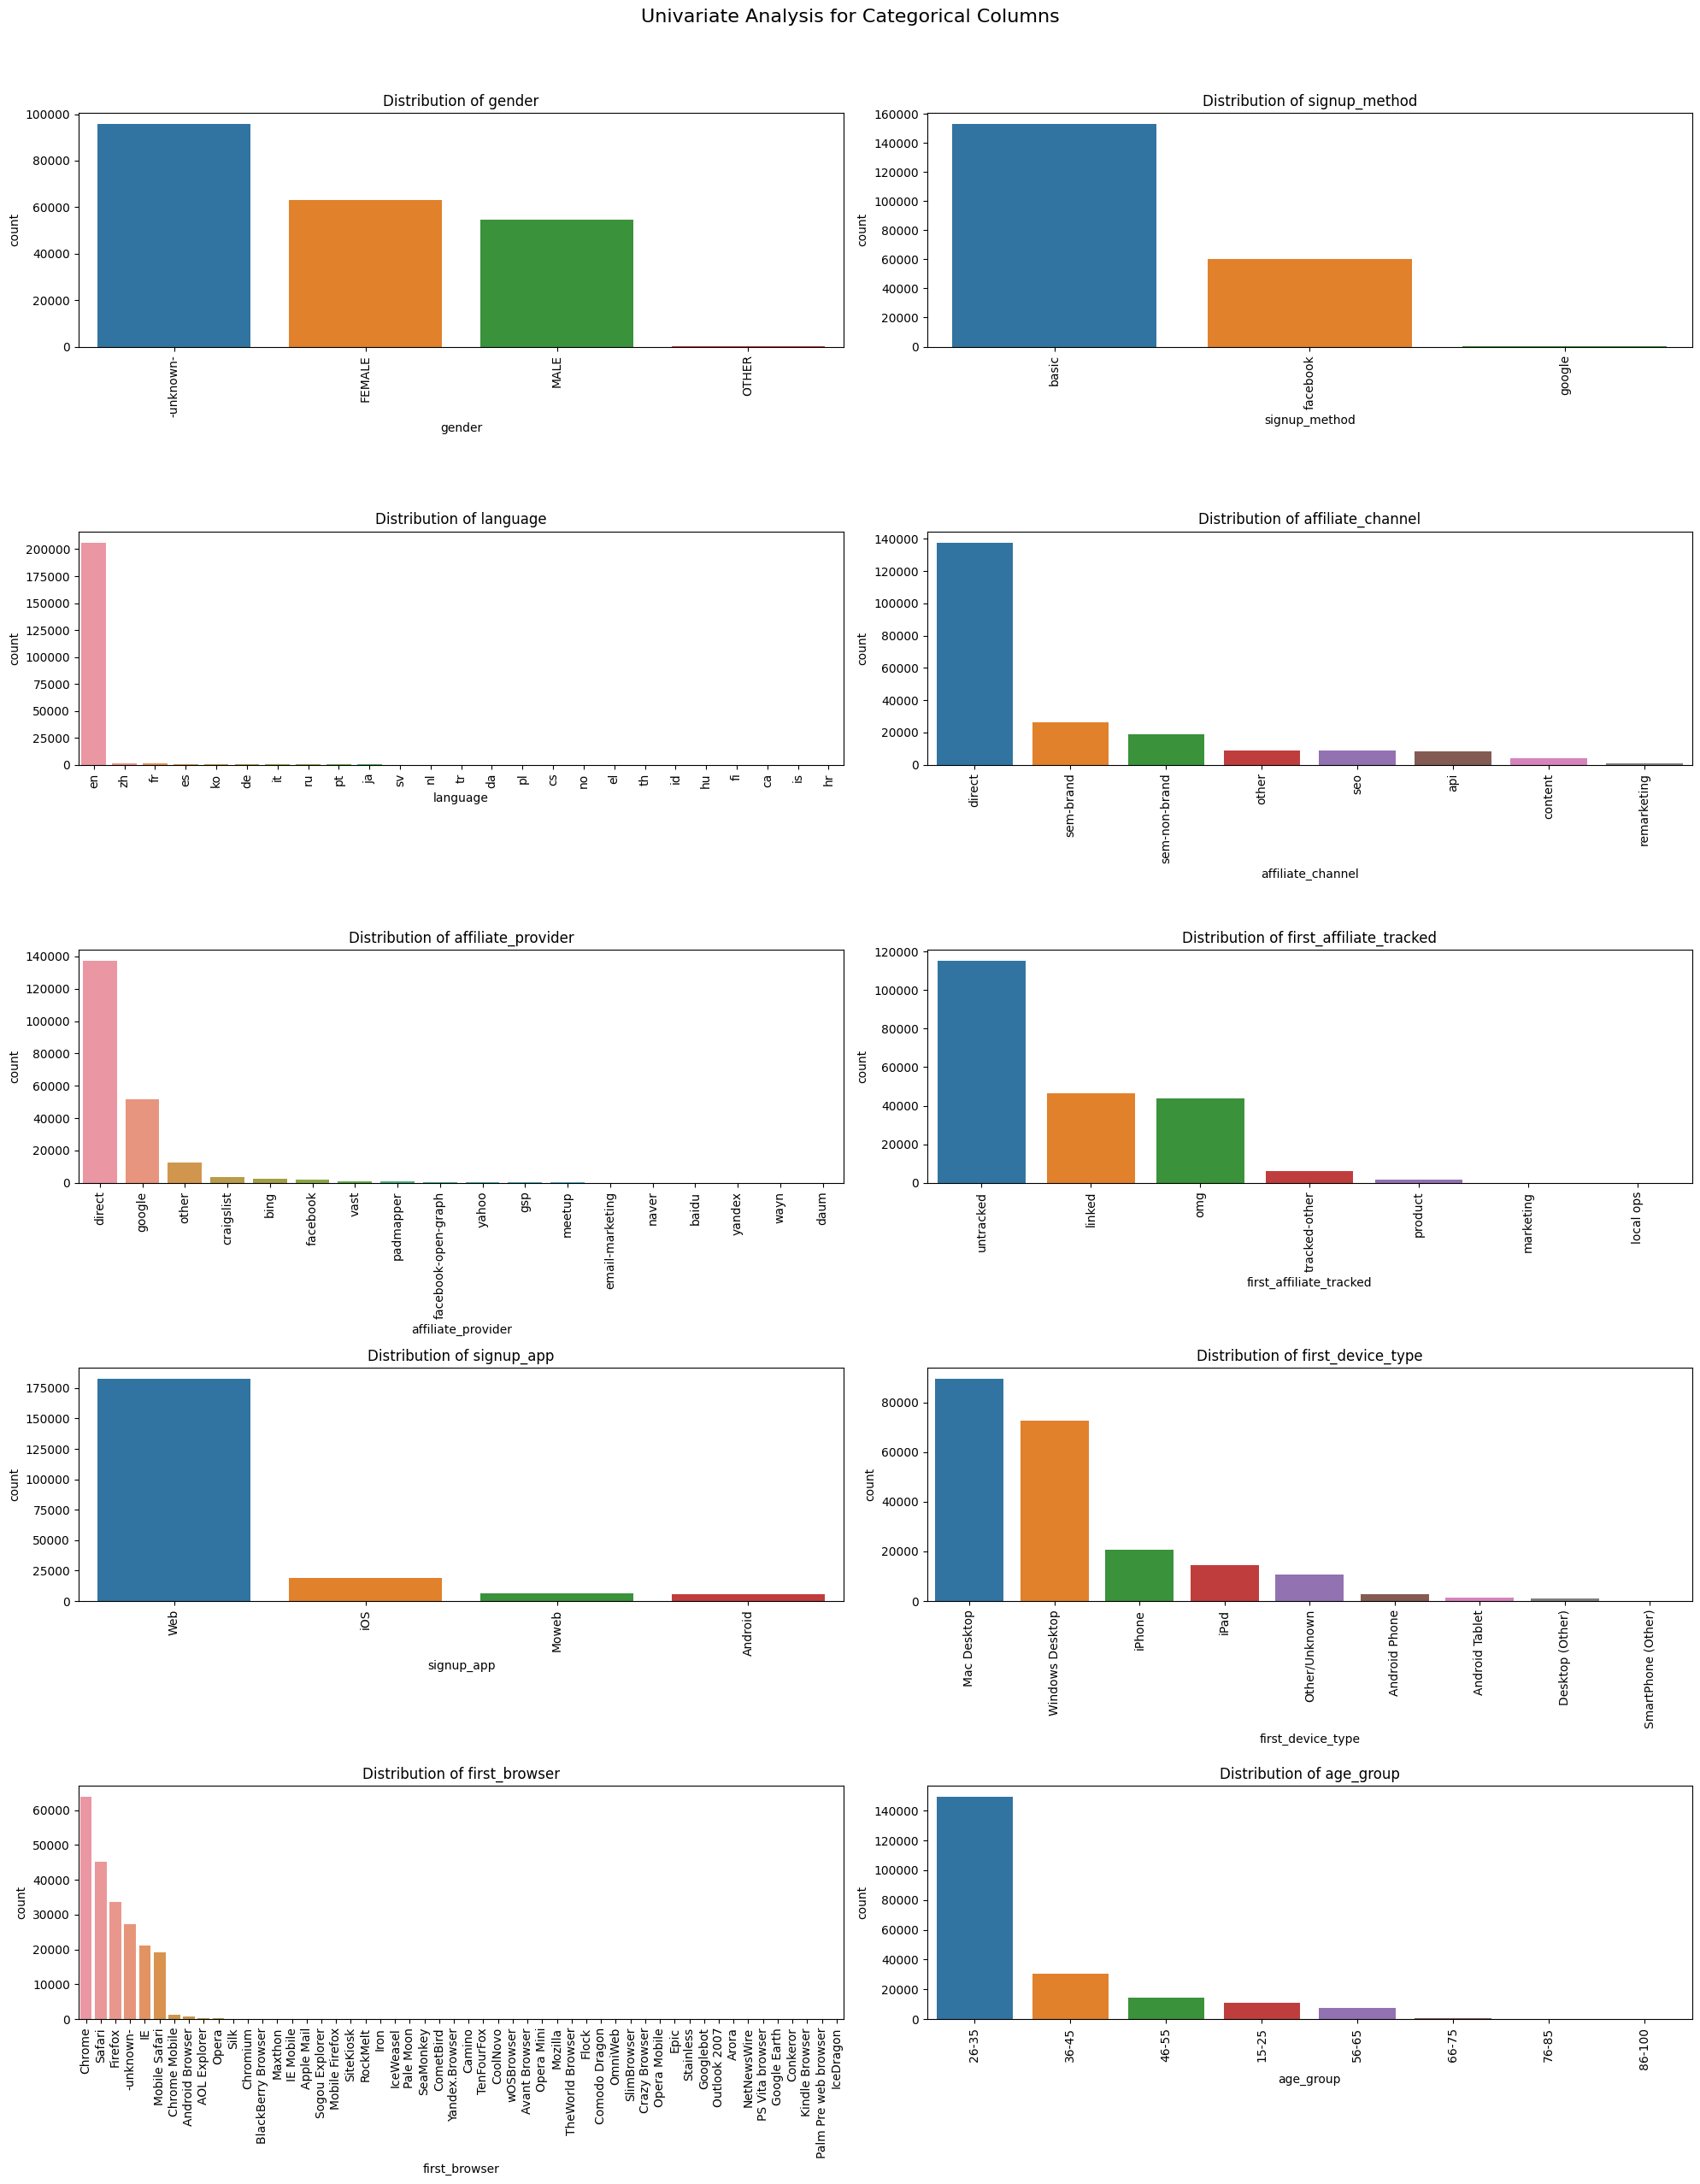

Univariate Analysis for Numerical Columns:


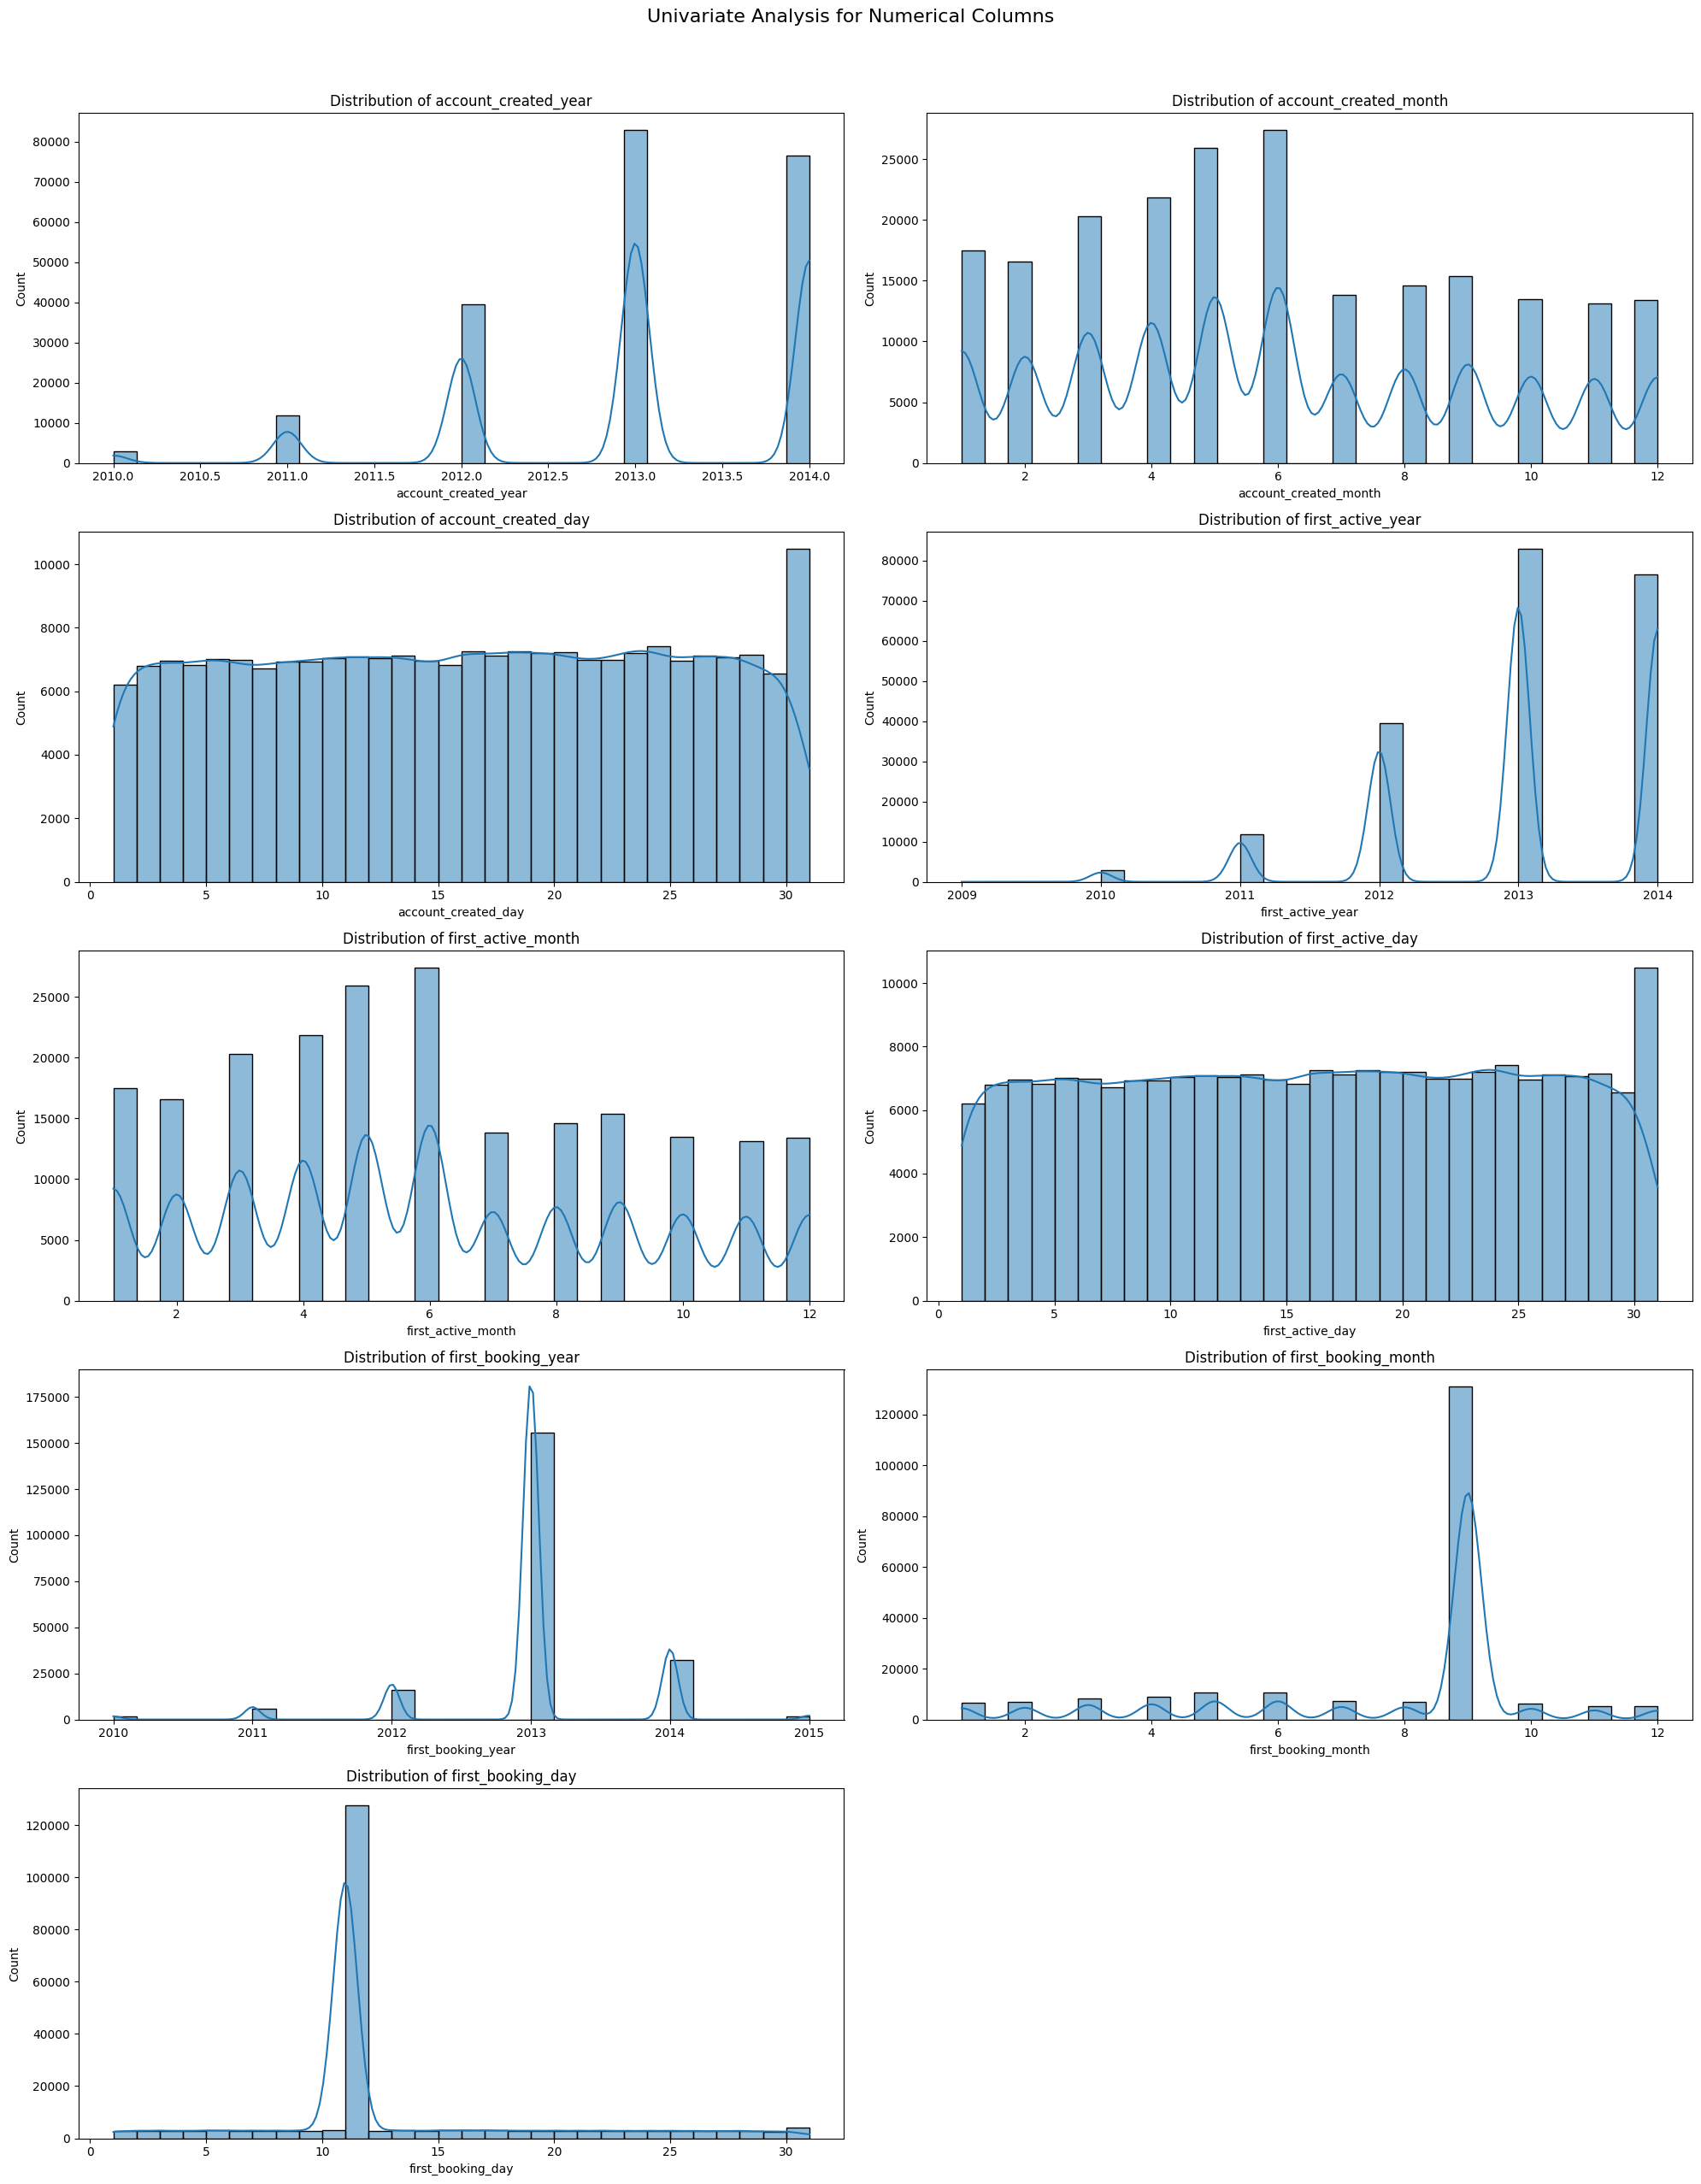

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

def univariate_analysis(df, numerical_cols, categorical_cols):
    print("\nUnivariate Analysis for Categorical Columns:")
    if categorical_cols:
        num_categorical = len(categorical_cols)
        nrows = (num_categorical // 2) + (1 if num_categorical % 2 != 0 else 0)
        ncols = 2

        # Create a grid of subplots
        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows * 5))
        fig.suptitle("Univariate Analysis for Categorical Columns", fontsize=16, y=1.02)

        axes = axes.flatten()

        for i, col in enumerate(categorical_cols):
            if col in df.columns:
                sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[i])
                axes[i].set_title(f"Distribution of {col}")
                axes[i].tick_params(axis='x', rotation=90)
            else:
                axes[i].axis('off')

        for j in range(i + 1, len(axes)):
            axes[j].axis('off')

        plt.tight_layout()
        plt.show()
    print("Univariate Analysis for Numerical Columns:")
    if numerical_cols:
        num_numerical = len(numerical_cols)
        nrows = (num_numerical // 2) + (1 if num_numerical % 2 != 0 else 0)
        ncols = 2  # Fixed to 3 columns

        # Create a grid of subplots
        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows * 5))
        fig.suptitle("Univariate Analysis for Numerical Columns", fontsize=16, y=1.02)

        axes = axes.flatten()

        for i, col in enumerate(numerical_cols):
            if col in df.columns:
                sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
                axes[i].set_title(f"Distribution of {col}")
            else:
                axes[i].axis('off')

        for j in range(i + 1, len(axes)):
            axes[j].axis('off')

        plt.tight_layout()
        plt.show()

    


numerical_cols = [ 'account_created_year', 'account_created_month', 
                  'account_created_day', 'first_active_year', 'first_active_month', 
                  'first_active_day', 'first_booking_year', 'first_booking_month', 
                  'first_booking_day']
categorical_cols = ['gender', 'signup_method', 'language', 'affiliate_channel', 
                    'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 
                    'first_device_type', 'first_browser', 'age_group']

univariate_analysis(train_users, numerical_cols, categorical_cols)

> ***Insights***

**For categorical data**
1. Gende: Most users are categorized as "Unknown," followed by "Female" then "male".
2. Signup mehod: Most users registered using the "basic" method.
3. Language: Most users use the main language "English".
4. Affiliate Channel: Direct is the most common channel, with fewer users coming from sem-brand or sem-non-brand.
5. Affiliate Provider: Direct and Google are the biggest providers
6. Signup App: Most signups happen on Web, followed by iOS. Very few use Moweb or Android.
7. First Device Type: Most people use Mac Desktop or Windows Desktop, followed by iPhone and iPad. Android devices are used much less.
8. First Browser Distribution: Chrome is the most used browser, followed by Safari and Firefox. Other browsers are rarely used.
9. Age Group: Most users are aged  26-35, followed by 36-45. Few users are younger than 25 or older than 65.







**For numerical data**
1. Most of the accounts where created in June 2013 specifically
2. Most os the first active accounts were in June
3. Also the year with the most booking was september 2013

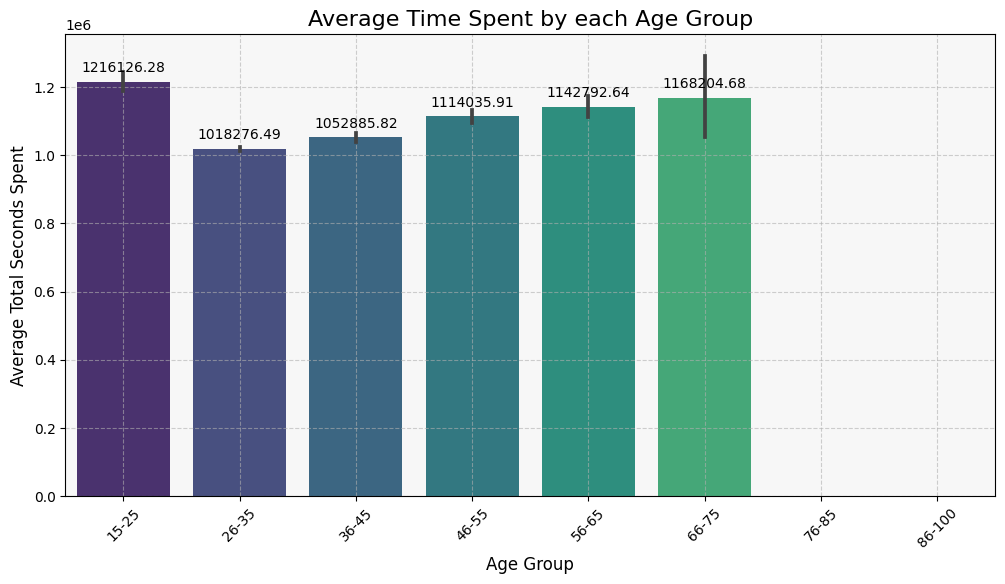

In [62]:

plt.figure(figsize=(12, 6))

ax = sns.barplot(x='age_group', y='total_secs', data=train_users, estimator='mean', palette='viridis')

plt.title("Average Time Spent by each Age Group", fontsize=16)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Average Total Seconds Spent", fontsize=12)

plt.xticks(rotation=45)

ax.grid(True, linestyle='--', alpha=0.6)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

ax.set_facecolor('#f7f7f7')

plt.show()

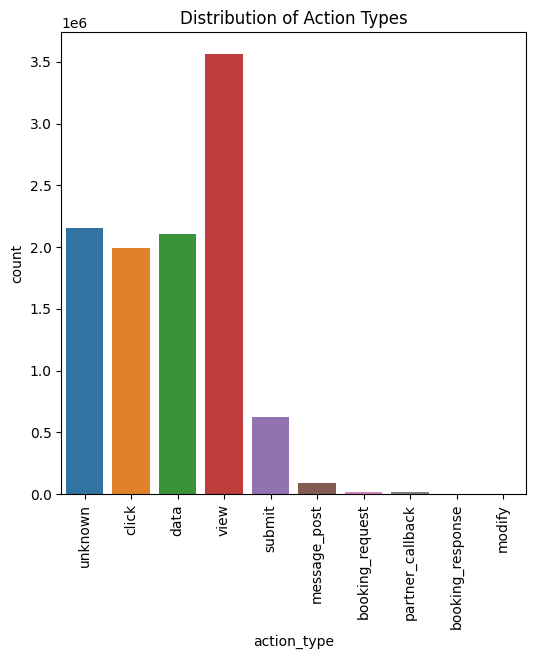

In [63]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df_sessions, x='action_type')
plt.title('Distribution of Action Types')
plt.xticks(rotation=90)
plt.show()

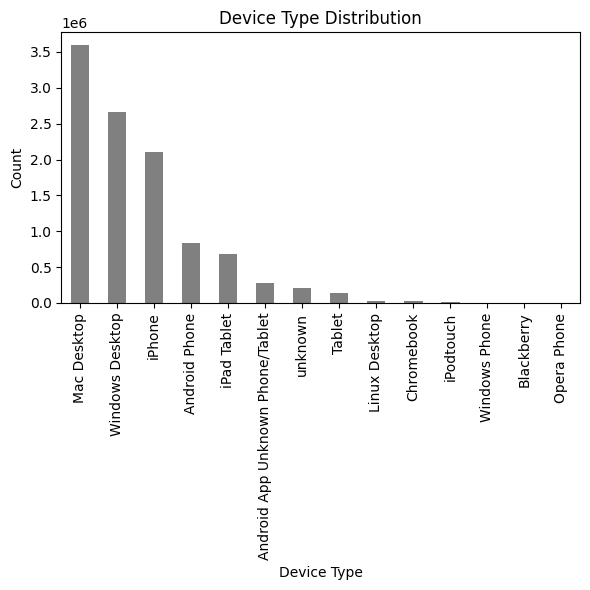

In [64]:
plt.figure(figsize=(6,6))
ax=df_sessions['device_type'].value_counts().plot(kind='bar', color='grey')
plt.title('Device Type Distribution')
plt.xlabel('Device Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of Distances')

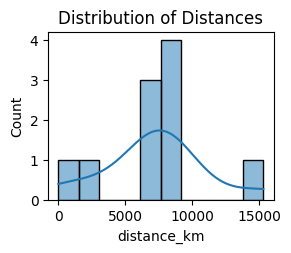

In [65]:
plt.subplot(2, 2, 2)
sns.histplot(df_countries['distance_km'], bins=10, kde=True)
plt.title('Distribution of Distances')

**2. Bivariate Analysis**


Bivariate Analysis for Categorical Columns vs Target:


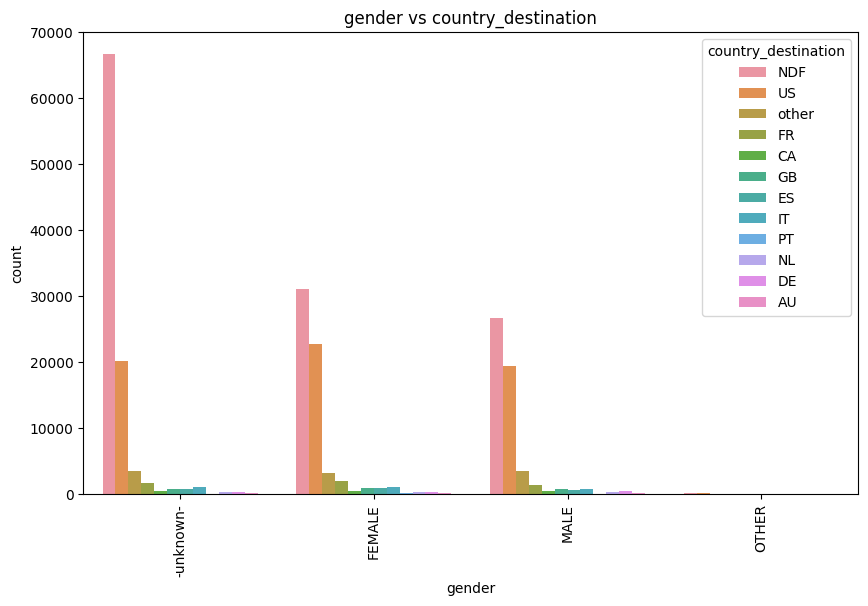

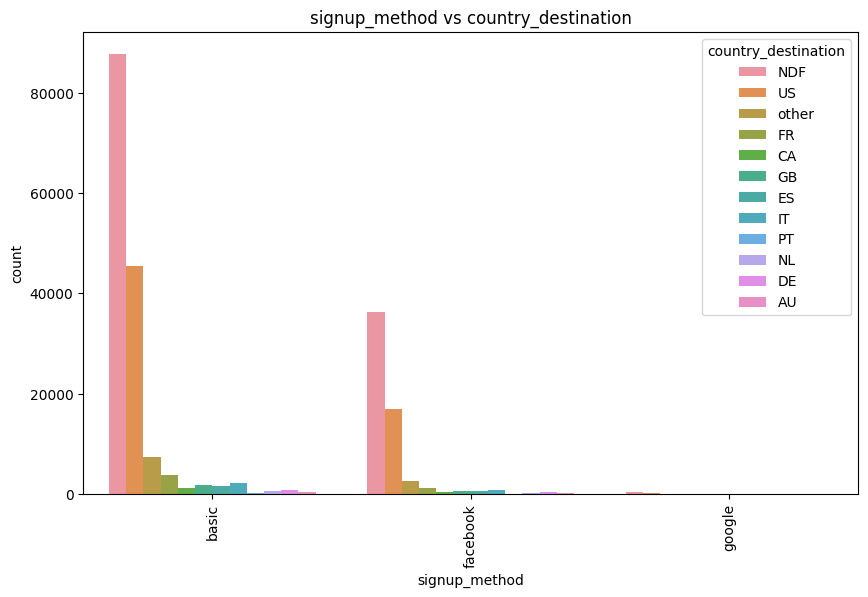

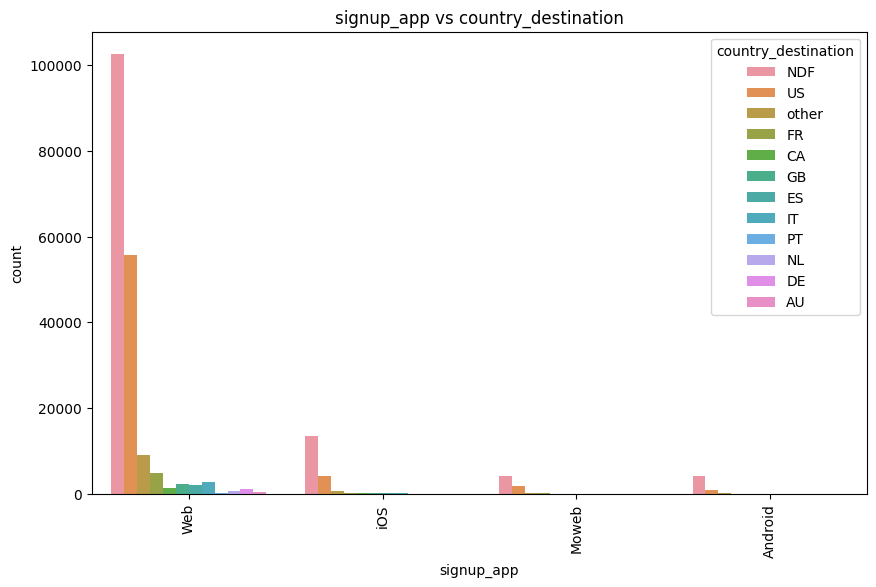

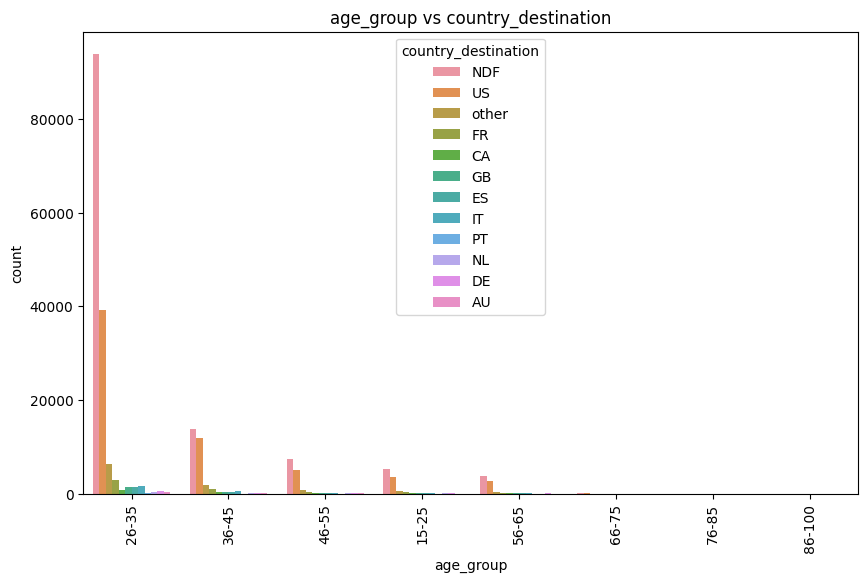

In [66]:
def bivariate_analysis(df, target_col, categorical_cols):
    print("\nBivariate Analysis for Categorical Columns vs Target:")
    for col in categorical_cols:
        if col in df.columns:
            plt.figure(figsize=(10, 6))
            sns.countplot(data=df, x=col, hue=target_col, order=df[col].value_counts().index)
            plt.title(f"{col} vs {target_col}")
            plt.xticks(rotation=90)
            plt.show()

target_col = 'country_destination'
categorical_cols = ['gender', 'signup_method','signup_app','age_group']

# Perform Bivariate Analysis on Train Dataset
bivariate_analysis(train_users, target_col, categorical_cols)

**For Gender**
* Most users "regardless of gender" belong to the NDF group, the US is the second most common destination for all genders.


**For age**
* Most ages belong to NDF group then US

<Figure size 1000x1000 with 0 Axes>

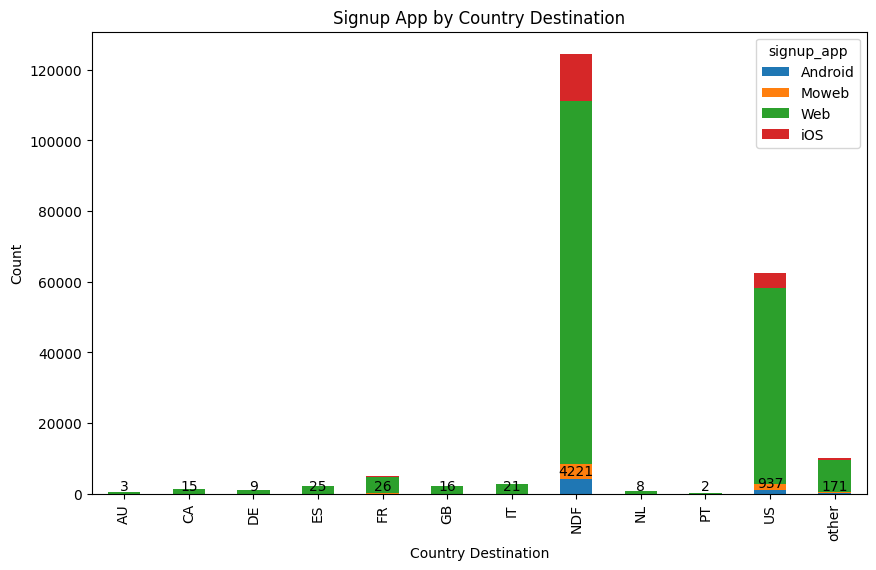

In [67]:
plt.figure(figsize=(10,10))
ax=train_users.groupby('country_destination')['signup_app'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Signup App by Country Destination')
plt.xlabel('Country Destination')
plt.ylabel('Count')
ax.bar_label(ax.containers[0])
plt.show()

<Figure size 1000x1000 with 0 Axes>

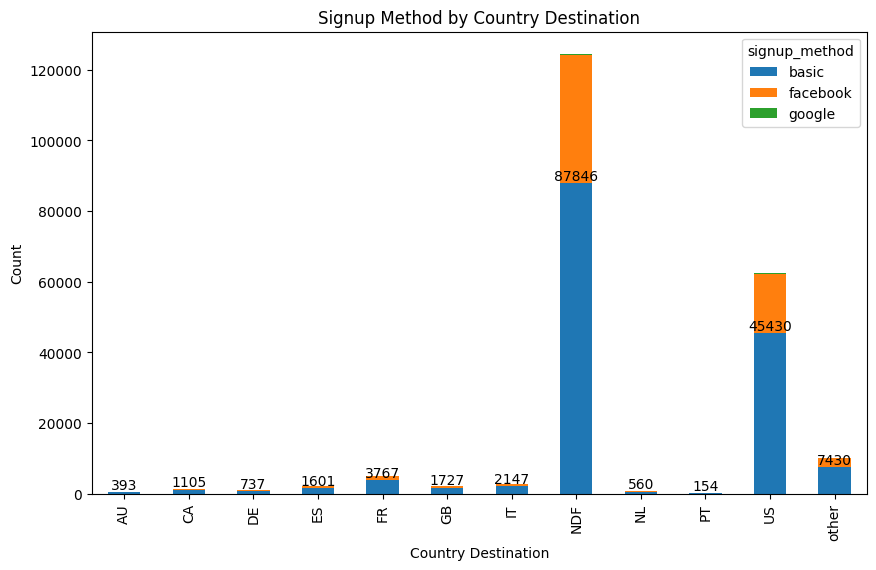

In [68]:
plt.figure(figsize=(10,10))
ax=train_users.groupby('country_destination')['signup_method'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Signup Method by Country Destination')
plt.xlabel('Country Destination')
plt.ylabel('Count')
ax.bar_label(ax.containers[0])
plt.show()

**For signup APP**
* Most users signed up using Web, especially for NDF and the US. IOS is the second most common signup APP.


**For Signup method**
* Most users signed up using basic, especially for NDF and the US. Facebook is the second most common signup method, used more for smaller destinations. Google is the least used signup method across all destinations.

***3-MultiVariate Analysis***


Multivariate Analysis: Correlation Matrix


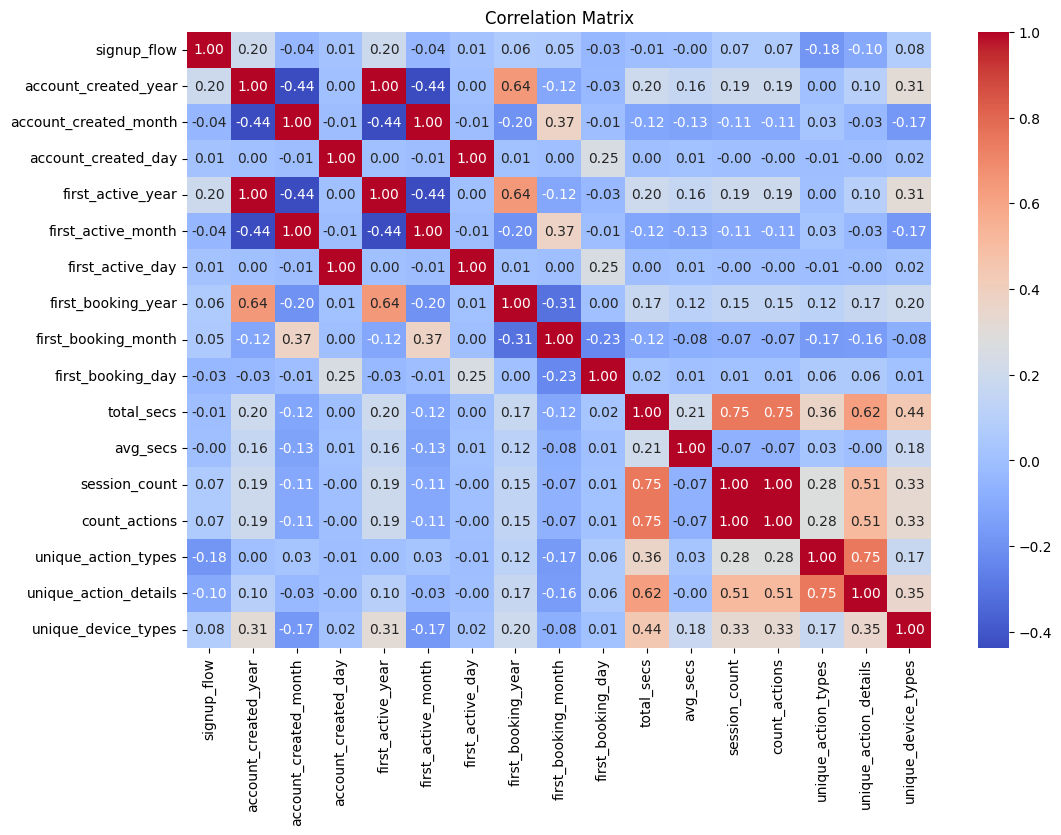

In [69]:
print("\nMultivariate Analysis: Correlation Matrix")
plt.figure(figsize=(12, 8))
corr = train_users.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.savefig(r'C:\Users\Dell\Desktop\action_type_distribution.png')  
plt.show()

***Insights***
**Strong relations:**
* TThe more total seconds sending on the plateform, the More actions taking.
* Users often book in the same year they create their account.

# 4. Data Preprocessing

In [70]:
train_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   id                       213451 non-null  object  
 1   gender                   213451 non-null  object  
 2   signup_method            213451 non-null  object  
 3   signup_flow              213451 non-null  int64   
 4   language                 213451 non-null  object  
 5   affiliate_channel        213451 non-null  object  
 6   affiliate_provider       213451 non-null  object  
 7   first_affiliate_tracked  213451 non-null  object  
 8   signup_app               213451 non-null  object  
 9   first_device_type        213451 non-null  object  
 10  first_browser            213451 non-null  object  
 11  country_destination      213451 non-null  object  
 12  age_group                213451 non-null  category
 13  account_created_year     213451 non-null  in

In [71]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

columns_to_encode = ['gender','signup_method', 'language', 'affiliate_channel', 'affiliate_provider', 
                     'first_affiliate_tracked', 'signup_app', 'first_device_type', 
                     'first_browser', 'age_group']

for column in columns_to_encode:
    train_users[column] = label_encoder.fit_transform(train_users[column].astype(str))


In [72]:
train_users['country_destination'] = label_encoder.fit_transform(train_users['country_destination'])#i transform it alone bec it isnot in df_test


In [73]:
train_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   gender                   213451 non-null  int64  
 2   signup_method            213451 non-null  int64  
 3   signup_flow              213451 non-null  int64  
 4   language                 213451 non-null  int64  
 5   affiliate_channel        213451 non-null  int64  
 6   affiliate_provider       213451 non-null  int64  
 7   first_affiliate_tracked  213451 non-null  int64  
 8   signup_app               213451 non-null  int64  
 9   first_device_type        213451 non-null  int64  
 10  first_browser            213451 non-null  int64  
 11  country_destination      213451 non-null  int64  
 12  age_group                213451 non-null  int64  
 13  account_created_year     213451 non-null  int32  
 14  acco

In [74]:
X = train_users.drop(['country_destination','id'], axis=1)
y = train_users['country_destination']

In [75]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [76]:
import xgboost as xgb

model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=12,
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    enable_categorical=True 
)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None, num_class=12,
              num_parallel_tree=None, ...)

In [77]:
y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy on validation set: {accuracy:.4f}')

y_pred_proba = model.predict_proba(X_val)

ndcg = ndcg_score(np.array(pd.get_dummies(y_val)), y_pred_proba, k=5)
print(f'NDCG@5 on validation set: {ndcg:.4f}')


Accuracy on validation set: 0.8749
NDCG@5 on validation set: 0.9267


In [78]:
for column in columns_to_encode:
    test_users[column] = label_encoder.fit_transform(test_users[column].astype(str))

In [79]:
test_users= test_users.drop('id', axis=1)


In [80]:
test_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62096 entries, 0 to 62095
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   62096 non-null  int64  
 1   age                      62096 non-null  float64
 2   signup_method            62096 non-null  int64  
 3   signup_flow              62096 non-null  int64  
 4   language                 62096 non-null  int64  
 5   affiliate_channel        62096 non-null  int64  
 6   affiliate_provider       62096 non-null  int64  
 7   first_affiliate_tracked  62096 non-null  int64  
 8   signup_app               62096 non-null  int64  
 9   first_device_type        62096 non-null  int64  
 10  first_browser            62096 non-null  int64  
 11  account_created_year     62096 non-null  int32  
 12  account_created_month    62096 non-null  int32  
 13  account_created_day      62096 non-null  int32  
 14  first_active_year     

In [81]:
y_pred_proba = model.predict_proba(X_val)
